1) implement a fully-vectorized loss function for the SVM

2) implement the fully-vectorized expression for its analytic gradient

3) check your implementation using numerical gradient

4) use a validation set to tune the learning rate and regularization strength

5) optimize the loss function with SGD

6) visualize the final learned weights


In [1]:
from __future__ import print_function
import random
import warnings

import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from cs231n.classifiers.linear_svm import svm_loss_naive
import time
from cs231n.gradient_check import grad_check_sparse
from cs231n.classifiers.linear_svm import svm_loss_vectorized
from cs231n.classifiers.linear_classifier import LinearSVM
from utils import get_cifar10, report, run_tasks, makedirs
from data_loader import loader_data, preprocessing

The grad returned from the function above is right now all zero.
Derive and implement the gradient for the SVM cost function and implement it inline inside the function svm_loss_naive by opening cs231n/classifiers/linear_svm.py in an editor of your choice.
You will find it helpful to interleave your new code inside the existing function.
To check that you have correctly implemented the gradient correctly, you can numerically estimate the gradient of the loss function and compare the numeric estimate to the gradient that you computed.
Once you've implemented the gradient, recompute it with the code below and gradient check it with the function we provided for you

In [2]:
def task1(X_dev, y_dev):
    print('*' * 30 + ' Task 1 ' + '*' * 30)

    np.random.seed(20)
    # generate a random SVM weight matrix of small numbers
    W = np.random.randn(3073, 10) * 0.0001

    loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.00001)
    f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
    print('Gradient check before regularization')
    grad_numerical = grad_check_sparse(f, W, grad)

    # do the gradient check once again with regularization turned on
    # you didn't forget the regularization gradient did you?
    loss, grad = svm_loss_naive(W, X_dev, y_dev, 1e2)
    f = lambda w: svm_loss_naive(w, X_dev, y_dev, 1e2)[0]
    print('Gradient check after regularization')
    grad_numerical = grad_check_sparse(f, W, grad)

    print('*' * 30 + ' Task 1 Completed' + '*' * 30)

In [3]:
X_train, y_train, X_val, y_val, X_dev, y_dev, X_test, y_test = loader_data()
X_train, X_val, X_test, X_dev = preprocessing(X_train, X_val, X_test, X_dev)
task1(X_dev, y_dev)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)
Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)
Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)
[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]
(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)
****************************** Task 1 ******************************
Gradient check before regularization
numerical: 26.933634 analytic: 26.933634, relative error: 3.665205e-11
numerical: -15.584097 analytic: -15.584097, relative error: 3.078342e-11
numerical: 56.409099 analytic: 56.409099, relative error: 8.431925e-13
numerical: 9.

In this task, we will train a linear classifier with SVM loss (i.e. Linear SVM) using the
Stochastic Gradient Descent (SGD) weight update approach

In [4]:
def task2(X_train, X_val, y_train, y_val, X_dev, y_dev):
    print('*' * 30 + ' Task 2 ' + '*' * 30)
    np.random.seed(20)
    # generate a random SVM weight matrix of small numbers
    W = np.random.randn(3073, 10) * 0.0001

    # for now only compute the loss;
    # we will implement the gradient in a moment.
    tic = time.time()
    loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
    toc = time.time()
    print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

    tic = time.time()
    loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
    toc = time.time()
    print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

    # The losses should match but your vectorized implementation should be much faster.
    print('difference between the naive loss and vectorized loss is: %f' % (loss_naive - loss_vectorized))

    # The naive implementation and the vectorized implementation should match, but
    # the vectorized version should still be much faster.
    tic = time.time()
    _, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.00001)
    toc = time.time()
    print('Naive loss and gradient: computed in %fs' % (toc - tic))

    tic = time.time()
    _, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.00001)
    toc = time.time()
    print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

    # The loss is a single number, so it is easy to compare the values computed
    # by the two implementations. The gradient on the other hand is a matrix, so
    # we use the Frobenius norm to compare them.
    difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
    print('difference between naive gradient and vectorized gradient: %f' % difference)

    '''
    In the file cs231n/classifiers/linear_classifier.py, implement SGD in the function LinearClassifier.train()
    and then run it with the code below. Note: there are two sections of code you need to update in this function
    plot the loss_hist and save the plot as hw1b_task2.png
    '''
    svm = LinearSVM()
    tic = time.time()
    loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=5e4,
                          num_iters=1500, verbose=True)
    toc = time.time()
    print('Training time took %fs' % (toc - tic))

    plt.plot(loss_hist)
    plt.xlabel("Iteration Numbers")
    plt.ylabel("Loss Value")
    plt.show()

    '''
    In the file cs231n/classifiers/linear_classifier.py, write the predict() function
    and evaluate the performance on both the training and validation set
    '''
    print(loss_hist)
    y_train_pred = svm.predict(X_train)
    print('training accuracy: %f' % (np.mean(y_train == y_train_pred),))
    y_val_pred = svm.predict(X_val)
    print('validation accuracy: %f' % (np.mean(y_val == y_val_pred),))

    print('*' * 30 + ' Task 2 Completed ' + '*' * 30)

****************************** Task 2 ******************************
Naive loss: 9.213319e+00 computed in 0.100999s
Vectorized loss: 9.213319e+00 computed in 0.002002s
difference between the naive loss and vectorized loss is: -0.000000
Naive loss and gradient: computed in 0.109997s
Vectorized loss and gradient: computed in 0.002001s
difference between naive gradient and vectorized gradient: 0.000000
iteration 0 / 1500: loss 1569.956327
iteration 100 / 1500: loss 570.323559
iteration 200 / 1500: loss 212.071876
iteration 300 / 1500: loss 80.665841
iteration 400 / 1500: loss 32.844103
iteration 500 / 1500: loss 15.451265
iteration 600 / 1500: loss 9.155880
iteration 700 / 1500: loss 7.344963
iteration 800 / 1500: loss 6.067627
iteration 900 / 1500: loss 5.704127
iteration 1000 / 1500: loss 6.644367
iteration 1100 / 1500: loss 6.592603
iteration 1200 / 1500: loss 5.904908
iteration 1300 / 1500: loss 5.956808
iteration 1400 / 1500: loss 5.827973
Training time took 4.081999s


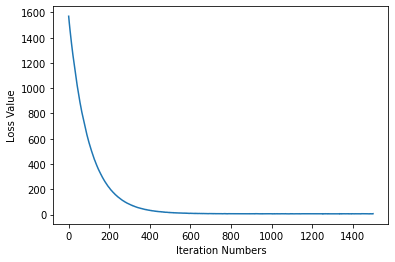

[1569.9563268993877, 1550.870312971311, 1536.068529640793, 1518.170121170877, 1504.3999502921931, 1486.9127689727634, 1470.070430175513, 1455.6304394812964, 1440.1133273799003, 1427.309257194301, 1411.840277097919, 1397.7007924450925, 1381.8988213717341, 1368.0006585669016, 1354.4159225929143, 1340.4646645824344, 1328.1643559427184, 1314.736837236409, 1300.730202330506, 1287.590374896753, 1274.4032334813173, 1262.3715240948463, 1250.6142093001272, 1237.2940320818468, 1224.8687408874569, 1211.5773412290027, 1199.5677760277272, 1187.4811137282004, 1175.0911539819435, 1164.3107004143014, 1150.5628515519008, 1139.1556574964056, 1129.5507773110278, 1116.080962869423, 1106.695423761247, 1095.7465084526011, 1083.3576825833748, 1073.9824545285683, 1063.7952426575478, 1051.6329986395915, 1043.04500342586, 1030.9625597970326, 1021.1842726543473, 1011.190276082173, 999.5846195903408, 990.333980998044, 979.8365416087859, 970.1886378011352, 961.3694935814596, 949.5929997125983, 941.7344759991912, 9

In [5]:
task2(X_train, X_val, y_train, y_val, X_dev, y_dev)

You should experiment with different ranges for the learning rates and regularization strengths; if you are careful you should be able to get a classification accuracy of about 0.4 on the validation set.
Write code that chooses the best hyperparameters by tuning on the validation set.
For each combination of hyperparameters, train a linear SVM on the training set, compute its accuracy on the training and validation sets, and store these numbers in the results dictionary.
In addition, store the best validation accuracy in best_val and the LinearSVM object that achieves this accuracy in best_svm.
Hint: You should use a small value for num_iters as you develop your validation code so that the SVMs don't take much time to train;
once you are confident that your validation code works, you should rerun the validation code with a larger value for num_iters.

In [55]:
def task3(X_test, y_test):
    print('*' * 30 + ' Task 3 ' + '*' * 30)
    # Like the below provided learning rates and regularization strengths
    # Try different learning rates and regularization strengths

    learning_rates = [1e-5, 5e-3]
    regularization_strengths = [5e4, 1e3]

    # results is dictionary mapping tuples of the form
    # (learning_rate, regularization_strength) to tuples of the form
    # (training_accuracy, validation_accuracy). The accuracy is simply the fraction
    # of data points that are correctly classified.
    results = {}
    best_val = -1  # The highest validation accuracy that we have seen so far.
    best_svm = None  # The LinearSVM object that achieved the highest validation rate.


    for lr in learning_rates:
        for reg in regularization_strengths:
            svm = LinearSVM()
            loss_hist = svm.train(X_train, y_train, learning_rate=lr, reg=reg,
                          num_iters=200, verbose=True)
            y_train_pred = svm.predict(X_train)
            y_val_pred = svm.predict(X_val)
            train_accuracy = np.mean(y_train == y_train_pred)
            val_accuracy = np.mean(y_val == y_val_pred)
            results[(lr, reg)] = (train_accuracy, val_accuracy)
            if val_accuracy > best_val:
                best_val = val_accuracy
                best_svm = svm

    # Print out results.
    for lr, reg in sorted(results):
        train_accuracy, val_accuracy = results[(lr, reg)]
        print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
            lr, reg, train_accuracy, val_accuracy))

    print('best validation accuracy achieved during cross-validation: %f' % best_val)

    y_test_pred = best_svm.predict(X_test)
    test_accuracy = np.mean(y_test == y_test_pred)
    print('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

    '''
    Visualize the learned weights for each class
    '''
    # Depending on your choice of learning rate and regularization strength, these may
    # or may not be nice to look at.
    w = best_svm.W[:-1, :]  # strip out the bias
    w = w.reshape(32, 32, 3, 10)
    w_min, w_max = np.min(w), np.max(w)
    classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        # Rescale the weights to be between 0 and 255
        wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
        plt.imshow(wimg.astype('uint8'))
        plt.title(classes[i], fontsize=10)
    plt.tight_layout()
    print('*' * 30 + ' Task 3 Completed ' + '*' * 30)

****************************** Task 3 ******************************
iteration 0 / 200: loss 1567.620833
iteration 100 / 200: loss 63.557902
iteration 0 / 200: loss 47.184455
iteration 100 / 200: loss 32.173834
iteration 0 / 200: loss 1552.059678
iteration 100 / 200: loss inf
iteration 0 / 200: loss 52.997831
iteration 100 / 200: loss 45113691852358722794718268559204250853690864052793198827819484837886474710122207110071637607363001957272224657406602810228736.000000
lr 1.000000e-05 reg 1.000000e+03 train accuracy: 0.276143 val accuracy: 0.287000
lr 1.000000e-05 reg 5.000000e+04 train accuracy: 0.211000 val accuracy: 0.217000
lr 5.000000e-03 reg 1.000000e+03 train accuracy: 0.083367 val accuracy: 0.089000
lr 5.000000e-03 reg 5.000000e+04 train accuracy: 0.100265 val accuracy: 0.087000
best validation accuracy achieved during cross-validation: 0.287000
linear SVM on raw pixels final test set accuracy: 0.252000
****************************** Task 3 Completed ******************************


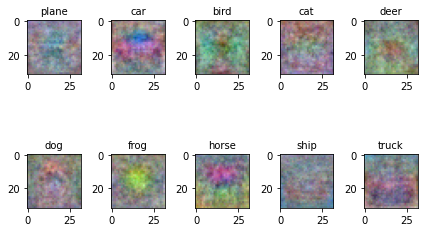

In [56]:
task3(X_test,y_test)